<H1>Analysis and Classification of MNIST Handwriting Dataset using different Models</H1>


Importing all the required Libraries

In [ ]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import np_utils
from keras.regularizers import L1L2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
image_size = 28
vector_size= image_size*image_size
X_train_len = len(X_train)
X_test_len = len(X_test)

<H2>Visualization of Dataset</H2>

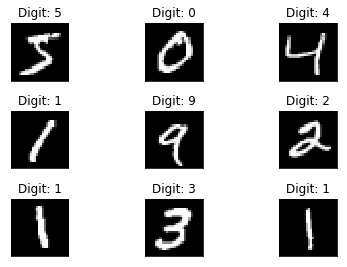

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

<H2>Plotting Distribution</H2>

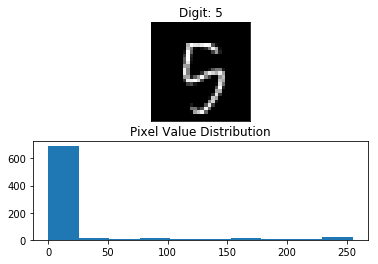

In [ ]:
import random
fig = plt.figure()
plt.subplot(2,1,1)
indext=random. randint(0,10000)
plt.imshow(X_train[indext], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[indext]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[indext].reshape(vector_size))
plt.title("Pixel Value Distribution")
fig

In [ ]:
print(type(X_train[0]))
platdata=X_train[0].reshape(vector_size)
for X in X_train:
  np.concatenate((platdata,X.reshape(vector_size)))
print(platdata.shape)


<class 'numpy.ndarray'>
(784,)


<H2>Data Preprocessing: Reshaping and Normalisation</H2>

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train_len, vector_size)
X_test = X_test.reshape(X_test_len, vector_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train_norm = X_train/255
X_test_norm = X_test/255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Dataset Distribution
0 : 980
1 : 1135
2 : 1032
3 : 1010
4 : 982
5 : 892
6 : 958
7 : 1028
8 : 974
9 : 1009


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)
for i in range(10):
  index = np.where(y_train==i)
  ind =index[0][0]
  print(str(y_train[ind]) + " =>  " + str(Y_train[ind]))

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
0 =>  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 =>  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 =>  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3 =>  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
4 =>  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
5 =>  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 =>  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7 =>  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 =>  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
9 =>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


<H2>Building Models</H2>

In [ ]:
names=["Logistic Regression with UnNormalized Data","Logistic Regression","Logistic Regression with L1","Logistic Regression with L2","Random Forest","Fully connected NN","CNN"]
trainacc=[]
testacc=[]
correct=[]
incorrect=[]
trainset={}
testset={}

In [ ]:
import pandas as pd
import seaborn as sn
def getmatrixfig(matrix):
  df_cm = pd.DataFrame(matrix, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])
  fig=plt.figure(figsize = (8,4))
  plt.title('Confusion Matrix')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  sn.set(font_scale=1.2)#for label size
  sn.heatmap(df_cm, cmap="YlGnBu",annot=True,annot_kws={"size": 14},fmt='g')# font size
  return fig

Logistic Regression with UnNromalized Data
Train Accuracy   :  0.8405
Test Accuracy    :  0.84
Correct Pred.    :  8400
InCorrect Pred.  :  1600


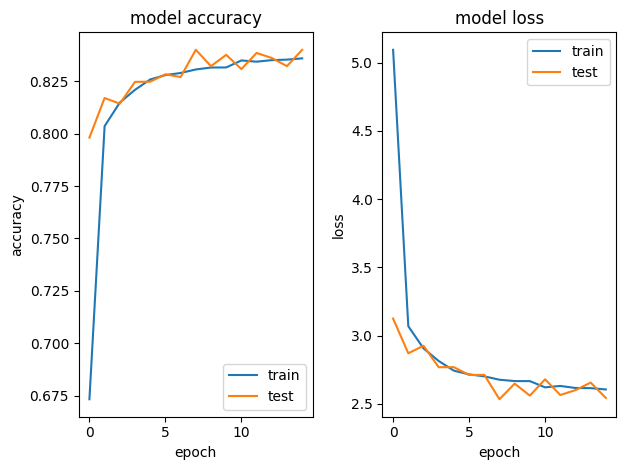

In [ ]:
# Logistic Regression with UnNormalized Data
model_LRNP = Sequential()
model_LRNP.add(Dense(10, input_shape=(vector_size,)))
model_LRNP.add(Activation('softmax'))
model_LRNP.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_LRNP.fit(X_train, Y_train,batch_size=128, epochs=15,verbose=0,validation_data=(X_test, Y_test))
test_loss_and_metrics = model_LRNP.evaluate(X_test, Y_test, verbose=0)
train_loss_and_metrics = model_LRNP.evaluate(X_train, Y_train, verbose=0)
predicted_classes = model_LRNP.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)

trainacc.append(train_loss_and_metrics[1])
testacc.append(test_loss_and_metrics[1])
correct.append(len(correct_indices))
incorrect.append(len(incorrect_indices))

print("Logistic Regression with UnNromalized Data")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))


# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['ulr']=history.history['acc']
testset['ulr']=history.history['val_acc']

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig


Confusion Matrix :  


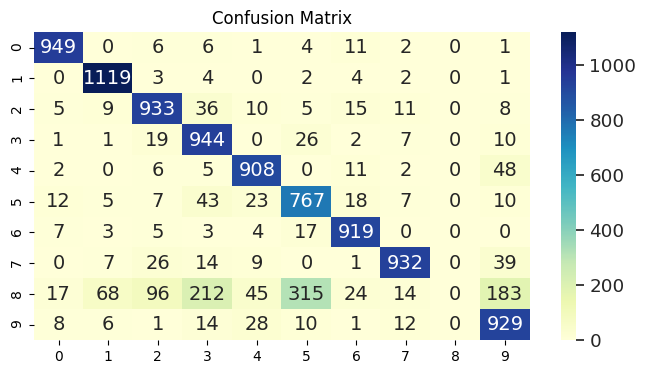

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

Logistic Regression
Train Accuracy   :  0.9306333333333333
Test Accuracy    :  0.9255
Correct Pred.    :  9255
InCorrect Pred.  :  745


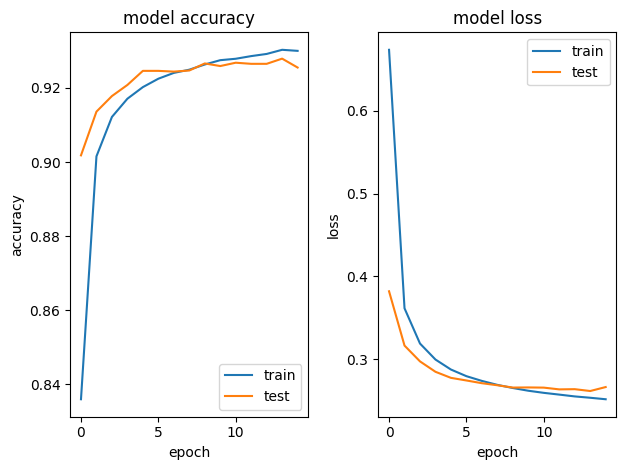

In [ ]:
# Logistic Regression
model_LRNP = Sequential()
model_LRNP.add(Dense(10, input_shape=(vector_size,)))
model_LRNP.add(Activation('softmax'))
model_LRNP.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_LRNP.fit(X_train_norm, Y_train,batch_size=128, epochs=15,verbose=0,validation_data=(X_test_norm, Y_test))
test_loss_and_metrics = model_LRNP.evaluate(X_test_norm, Y_test, verbose=0)
train_loss_and_metrics = model_LRNP.evaluate(X_train_norm, Y_train, verbose=0)
predicted_classes = model_LRNP.predict_classes(X_test_norm)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)
print("Logistic Regression")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))
# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['lr']=history.history['acc']
testset['lr']=history.history['val_acc']


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig



Confusion Matrix :  


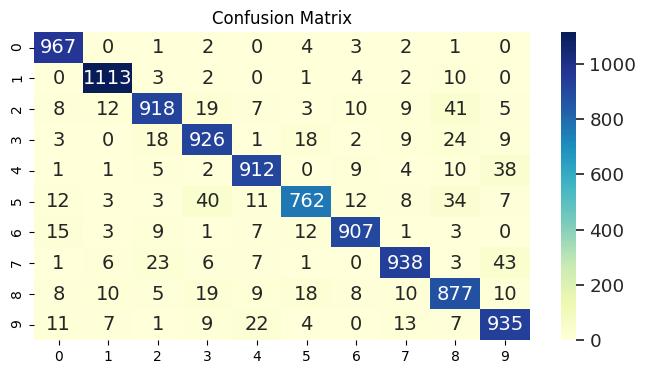

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

Logistic Regression with L1
Train Accuracy   :  0.9258666666666666
Test Accuracy    :  0.9249
Correct Pred.    :  9249
InCorrect Pred.  :  751


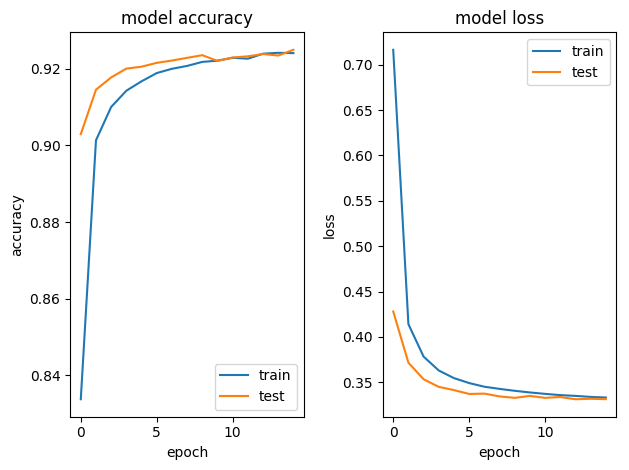

In [ ]:
# Logistic Regression with L1
model_LRNP = Sequential()
model_LRNP.add(Dense(10,kernel_regularizer=L1L2(l1=0.0001, l2=0.0), input_shape=(vector_size,)))
model_LRNP.add(Activation('softmax'))
model_LRNP.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_LRNP.fit(X_train_norm, Y_train,batch_size=128, epochs=15,verbose=0,validation_data=(X_test_norm, Y_test))
test_loss_and_metrics = model_LRNP.evaluate(X_test_norm, Y_test, verbose=0)
train_loss_and_metrics = model_LRNP.evaluate(X_train_norm, Y_train, verbose=0)
predicted_classes = model_LRNP.predict_classes(X_test_norm)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)
print("Logistic Regression with L1")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))
# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['lrl1']=history.history['acc']
testset['lrl1']=history.history['val_acc']


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Confusion Matrix :  


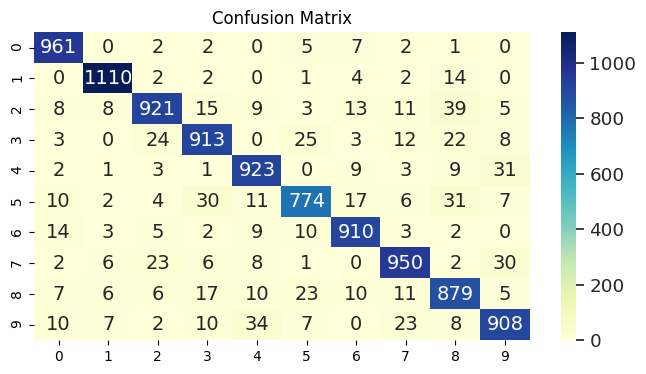

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

Logistic Regression with L2
Train Accuracy   :  0.9177333333333333
Test Accuracy    :  0.9199
Correct Pred.    :  9199
InCorrect Pred.  :  801


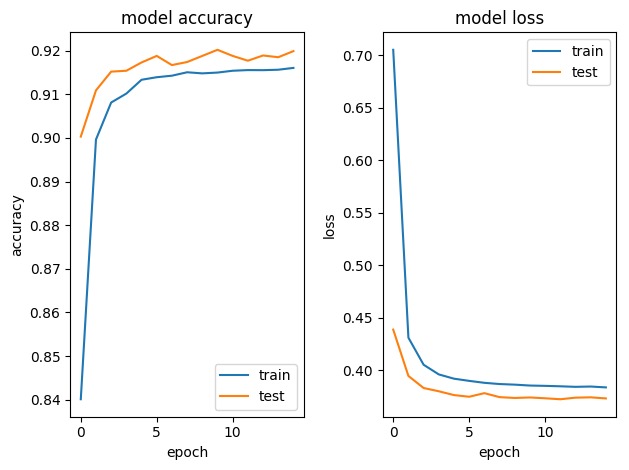

In [ ]:
# Logistic Regression with L2
model_LRNP = Sequential()
model_LRNP.add(Dense(10,kernel_regularizer=L1L2(l1=0.0, l2=0.001), input_shape=(vector_size,)))
model_LRNP.add(Activation('softmax'))
model_LRNP.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model_LRNP.fit(X_train_norm, Y_train,batch_size=128, epochs=15,verbose=0,validation_data=(X_test_norm, Y_test))
test_loss_and_metrics = model_LRNP.evaluate(X_test_norm, Y_test, verbose=0)
train_loss_and_metrics = model_LRNP.evaluate(X_train_norm, Y_train, verbose=0)
predicted_classes = model_LRNP.predict_classes(X_test_norm)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)
print("Logistic Regression with L2")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))
# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['lrl2']=history.history['acc']
testset['lrl2']=history.history['val_acc']


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Confusion Matrix :  


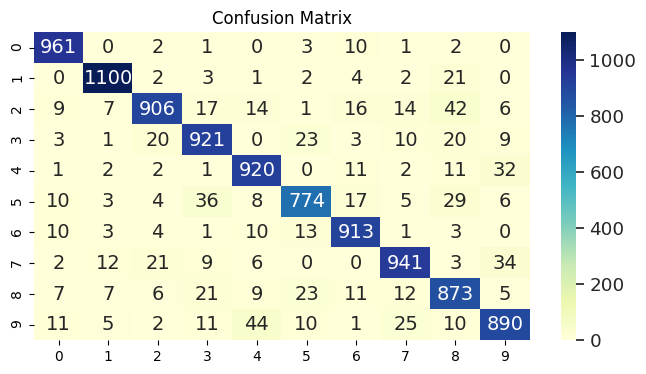

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

In [ ]:
# Random Forest
clf=RandomForestClassifier()
clf.fit(X_train_norm,y_train)
prediction_train = clf.predict(X_train_norm)
prediction_validation = clf.predict(X_test_norm)
correct_indices = np.nonzero(prediction_validation == y_test)[0]
incorrect_indices = np.nonzero(prediction_validation != y_test)[0]
matrix = confusion_matrix(y_test,prediction_validation)
print("Random Forest")
print("Train Accuracy   :  " +str(accuracy_score(y_train,prediction_train)))
print("Test Accuracy    :  " +str(accuracy_score(y_test,prediction_validation)))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest
Train Accuracy   :  0.9993
Test Accuracy    :  0.9487
Correct Pred.    :  9487
InCorrect Pred.  :  513


Confusion Matrix :  


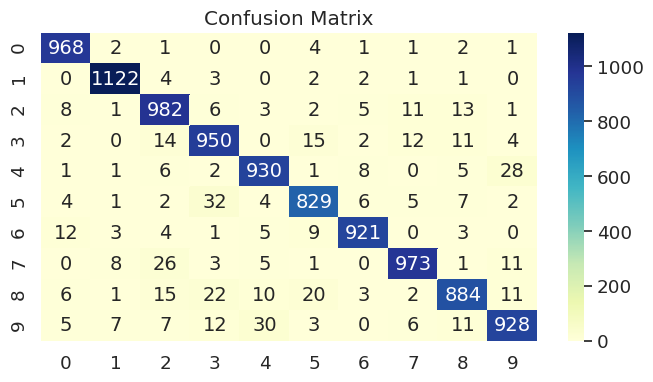

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 12s 207us/step - loss: 0.2468 - acc: 0.9265 - val_loss: 0.1173 - val_acc: 0.9636
Epoch 2/15
60000/60000 [==============================] - 12s 195us/step - loss: 0.1009 - acc: 0.9681 - val_loss: 0.0820 - val_acc: 0.9737
Epoch 3/15
60000/60000 [==============================] - 12s 195us/step - loss: 0.0716 - acc: 0.9777 - val_loss: 0.0747 - val_acc: 0.9754
Epoch 4/15
60000/60000 [==============================] - 12s 192us/step - loss: 0.0565 - acc: 0.9814 - val_loss: 0.0654 - val_acc: 0.9795
Epoch 5/15
60000/60000 [==============================] - 12s 193us/step - loss: 0.0465 - acc: 0.9851 - val_loss: 0.0656 - val_acc: 0.9805
Epoch 6/15
60000/60000 [==============================] - 12s 193us/step - loss: 0.0389 - acc: 0.9878 - val_loss: 0.0705 - val_acc: 0.9806


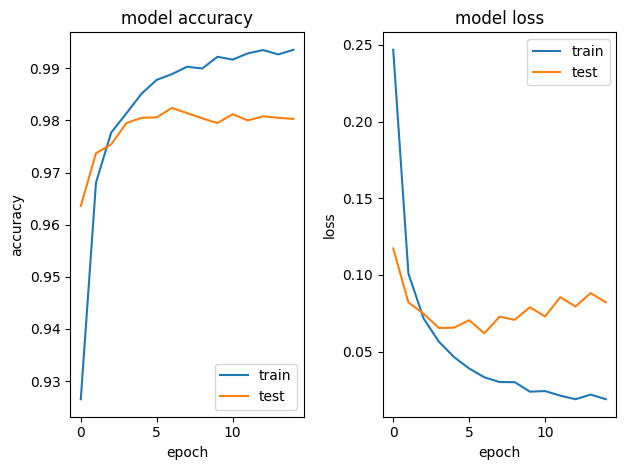

In [ ]:
# Fully Connected Neural Network
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train_norm, Y_train,batch_size=128, epochs=15,verbose=1,validation_data=(X_test_norm, Y_test))
test_loss_and_metrics = model.evaluate(X_test_norm, Y_test, verbose=0)
train_loss_and_metrics = model.evaluate(X_train_norm, Y_train, verbose=0)
predicted_classes = model.predict_classes(X_test_norm)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)
print("Logistic Regression with L2")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))
# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['fnn']=history.history['acc']
testset['fnn']=history.history['val_acc']


plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Confusion Matrix :  


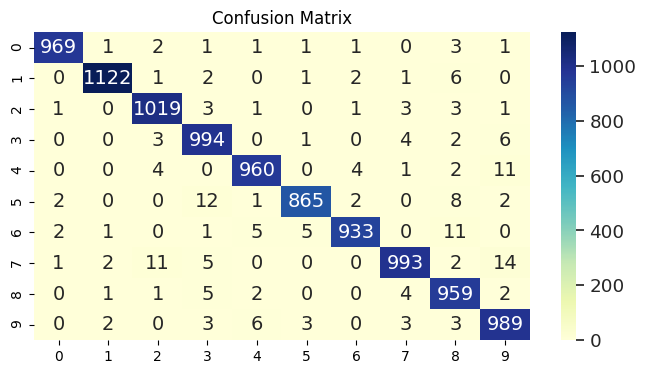

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2475 - acc: 0.9291 - val_loss: 0.0879 - val_acc: 0.9744
Epoch 2/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0845 - acc: 0.9747 - val_loss: 0.0614 - val_acc: 0.9809
Epoch 3/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0581 - acc: 0.9826 - val_loss: 0.0555 - val_acc: 0.9820
Epoch 4/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0447 - acc: 0.9863 - val_loss: 0.0575 - val_acc: 0.9828
Epoch 5/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0362 - acc: 0.9884 - val_loss: 0.0476 - val_acc: 0.9858
Epoch 6/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0296 - acc: 0.9907 - val_loss: 0.0496 - val_acc: 0.9846
Epoch 7/15
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0446 - val_acc

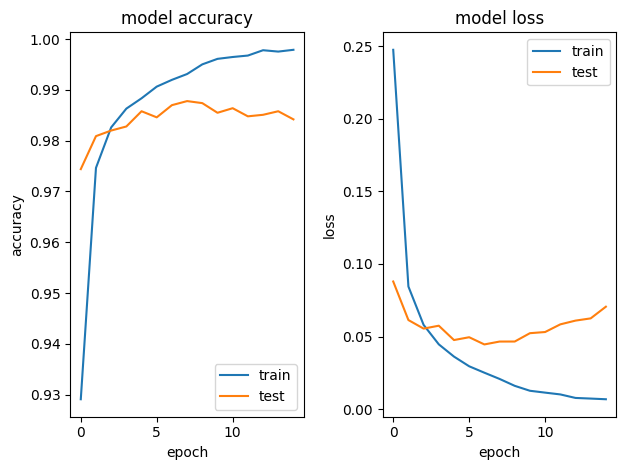

In [ ]:
# Convolution Neural Network
(X_train,temp1), (X_test,temp2) = mnist.load_data()
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)
X_train_norm = X_train/255
X_test_norm = X_test/255
model = Sequential()
#add model layers
model.add(Conv2D(20, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(15, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train_norm, Y_train,batch_size=128, epochs=15,verbose=1,validation_data=(X_test_norm, Y_test))
test_loss_and_metrics = model.evaluate(X_test_norm, Y_test, verbose=0)
train_loss_and_metrics = model.evaluate(X_train_norm, Y_train, verbose=0)
predicted_classes = model.predict_classes(X_test_norm)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
matrix = confusion_matrix(y_test, predicted_classes)
print("Logistic Regression with L2")
print("Train Accuracy   :  " +str(train_loss_and_metrics[1]))
print("Test Accuracy    :  " +str(test_loss_and_metrics[1]))
print("Correct Pred.    :  " +str(len(correct_indices)))
print("InCorrect Pred.  :  " +str(len(incorrect_indices)))
# plotting the metrics
fig = plt.figure()
plt.style.use('default')
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

trainset['cnn']=history.history['acc']
testset['cnn']=history.history['val_acc']

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Confusion Matrix :  


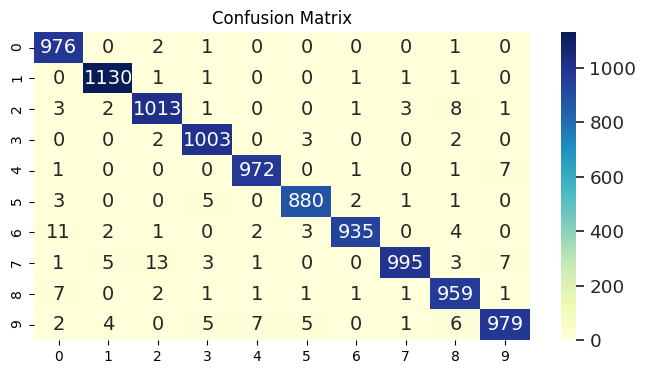

In [ ]:
print("Confusion Matrix :  ")
getmatrixfig(matrix)

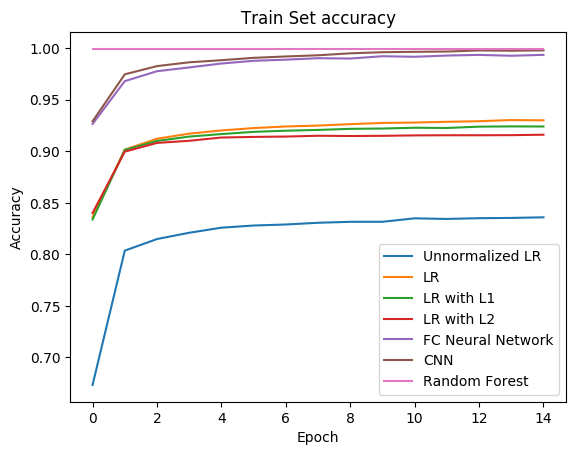

In [ ]:
fig = plt.figure()
plt.style.use('default')
plt.plot(trainset['ulr'])
plt.plot(trainset['lr'])
plt.plot(trainset['lrl1'])
plt.plot(trainset['lrl2'])
plt.plot(trainset['fnn'])
plt.plot(trainset['cnn'])
plt.plot([0.9993]*15)
plt.title('Train Set accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unnormalized LR', 'LR',"LR with L1","LR with L2","FC Neural Network","CNN","Random Forest"], loc='lower right')
fig


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


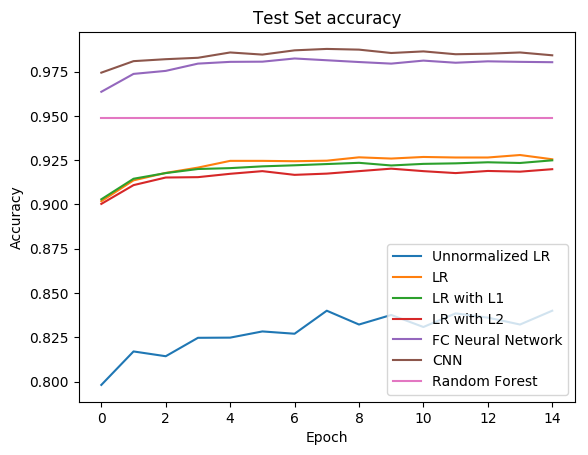

In [ ]:
fig = plt.figure()
plt.style.use('default')
plt.plot(testset['ulr'])
plt.plot(testset['lr'])
plt.plot(testset['lrl1'])
plt.plot(testset['lrl2'])
plt.plot(testset['fnn'])
plt.plot(testset['cnn'])
plt.plot([0.9487]*15)
plt.title('Test Set accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unnormalized LR', 'LR',"LR with L1","LR with L2","FC Neural Network","CNN","Random Forest"], loc='lower right')
fig